<a href="https://colab.research.google.com/github/rara-by/Practice-Notebooks/blob/main/DSCI6011_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Libraries

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
%%bash
pip install -U ultralytics

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
INPUT_IMAGE_PATH = '/content/drive/MyDrive/Project/yolov5/dataset_resized_full/dataset_resized'
file_path = '/content/drive/MyDrive/Project/yolov5/runs/train/exp29/weights/best.pt'

In [ ]:
# import os
# import shutil
# import random
# from pathlib import Path

# def split_images(source_folder, output_folder, train_ratio=0.8, val_ratio=0.1):
#     # Create output folders
#     (Path(output_folder) / 'train').mkdir(exist_ok=True)
#     (Path(output_folder) / 'validation').mkdir(exist_ok=True)
#     (Path(output_folder) / 'test').mkdir(exist_ok=True)

#     # Get all image paths
#     images = list(Path(source_folder).glob('*.jpg')) + list(Path(source_folder).glob('*.jpeg')) + list(Path(source_folder).glob('*.png'))
#     random.shuffle(images)

#     # Split images
#     total_images = len(images)
#     train_count = int(total_images * train_ratio)
#     val_count = int(total_images * val_ratio)

#     train_images = images[:train_count]
#     val_images = images[train_count:train_count + val_count]
#     test_images = images[train_count + val_count:]

#     # Move images to respective folders
#     move_images(train_images, output_folder, 'train')
#     move_images(val_images, output_folder, 'validation')
#     move_images(test_images, output_folder, 'test')

# def move_images(images, output_folder, folder_name):
#     for img in images:
#         shutil.move(img, Path(output_folder) / folder_name / img.name)

# # Source folder containing all images
# source_folder = INPUT_IMAGE_PATH

# # Output folder to store train, validation, and test sets
# output_folder = INPUT_IMAGE_PATH

# split_images(source_folder, output_folder)


In [ ]:
# import os
# import pandas as pd
# from pathlib import Path

# # Paths to train, validation, and test folders
# train_folder = '/content/drive/MyDrive/yolo/dataset_resized/train'
# val_folder = '/content/drive/MyDrive/yolo/dataset_resized/validation'
# test_folder = '/content/drive/MyDrive/yolo/dataset_resized/test'

# # Function to filter files by specific extensions
# def filter_files_by_extension(folder, extensions):
#     return [file.name for file in Path(folder).glob('*') if file.suffix.lower() in extensions]

# # Allowed image extensions
# image_extensions = ['.jpeg', '.jpg', '.png']

# # Get the list of filenames with allowed extensions in train, validation, and test folders
# train_files = filter_files_by_extension(train_folder, image_extensions)
# val_files = filter_files_by_extension(val_folder, image_extensions)
# test_files = filter_files_by_extension(test_folder, image_extensions)

# # Load the original annotations file
# annotations = pd.read_csv('/content/drive/MyDrive/yolo/dataset_resized/Copy of annotations.csv')

# # Filter annotations for train, validation, and test images
# train_annotations = annotations[annotations['filename'].isin(train_files)]
# val_annotations = annotations[annotations['filename'].isin(val_files)]
# test_annotations = annotations[annotations['filename'].isin(test_files)]

# # Save filtered annotations to new CSV files
# train_annotations.to_csv('/content/drive/MyDrive/yolo/dataset_resized/trainannotations.csv', index=False)
# val_annotations.to_csv('/content/drive/MyDrive/yolo/dataset_resized/validationannotations.csv', index=False)
# test_annotations.to_csv('/content/drive/MyDrive/yolo/dataset_resized/testannotations.csv', index=False)


Convert Labels

In [ ]:
import pandas as pd

annotations = pd.read_csv('/content/drive/MyDrive/Project/dataset_resized/test/testannotations.csv')

In [ ]:
annotations.head()

,Unnamed: 0,filename,parking_lots
0,5,uyhk.jpg,"[[58.0, 119.0, 132.0, 157.0, 0], [172.0, 71.0,..."
1,8,zxcvgbhn.jpg,"[[0.0, 82.0, 72.0, 131.0, 1], [18.0, 122.0, 14..."
2,17,teh5.jpg,"[[15.0, 74.0, 72.0, 115.0, 1], [75.0, 75.0, 12..."
3,26,efwsx.jpg,"[[0.0, 62.0, 44.0, 112.0, 1], [38.0, 80.0, 100..."
4,33,24wtrdg.jpg,"[[19.0, 110.0, 74.0, 154.0, 1], [94.0, 106.0, ..."


In [ ]:
annotations = annotations.drop('Unnamed: 0', axis=1)

In [ ]:
annotations.head()

,filename,parking_lots
0,uyhk.jpg,"[[58.0, 119.0, 132.0, 157.0, 0], [172.0, 71.0,..."
1,zxcvgbhn.jpg,"[[0.0, 82.0, 72.0, 131.0, 1], [18.0, 122.0, 14..."
2,teh5.jpg,"[[15.0, 74.0, 72.0, 115.0, 1], [75.0, 75.0, 12..."
3,efwsx.jpg,"[[0.0, 62.0, 44.0, 112.0, 1], [38.0, 80.0, 100..."
4,24wtrdg.jpg,"[[19.0, 110.0, 74.0, 154.0, 1], [94.0, 106.0, ..."


In [ ]:
from ast import literal_eval

In [ ]:
path = '/content/drive/MyDrive/Project/dataset_resized/test/labels/'
for index, row in annotations.iterrows():
    lots = literal_eval((annotations['parking_lots'][index]))
    # print(lots)
    filename = annotations['filename'][index]
    filename = filename.split('.')
    filename = filename[0] + '.txt'
    parking_lots_list =  lots # Accessing the 'parking_lots' column for each row
    with open(path + filename, 'w') as f:

      # Looping through the 'parking_lots' list of lists
      for parking_lot in parking_lots_list:
          # print(parking_lot)
          x1, y1, x2, y2, label = parking_lot

          size = 224
          dw = 1./(size)
          dh = 1./(size)
          x = (x1 + y1)/2.0 - 1
          y = (x2 + y2)/2.0 - 1
          w = y1 - x1
          h = y2 - x2
          x = abs(x*dw)
          w = abs(w*dw)
          y = abs(y*dh)
          h = abs(h*dh)

          line = str(label) + ' '+ str(x) + ' ' + str(y) + ' '+ str(w) + ' ' + str(h) + ' \n'
          f.write(line)
      f.close()




In [ ]:
import os

folder_path = '/content/drive/MyDrive/Project/dataset_resized/train/labels'

# List all files in the directory
files = os.listdir(folder_path)

# Iterate through files and rename those starting with 'labels'
for file in files:
    if file.startswith('labels'):
        old_path = os.path.join(folder_path, file)
        new_path = os.path.join(folder_path, file.replace('labels', '', 1))  # Replace 'labels' with an empty string
        os.rename(old_path, new_path)


In [ ]:
# import os
# import shutil

# source_folder = '/content/drive/MyDrive/yolo/dataset_resized/train'
# destination_folder = '/content/drive/MyDrive/yolo/dataset_resized/train/labels'

# # Ensure the destination folder exists
# os.makedirs(destination_folder, exist_ok=True)

# # List all files in the source folder
# files = os.listdir(source_folder)

# # Iterate through files and move those with .txt extension to the destination folder
# for file in files:
#     if file.endswith('.txt'):
#         source_file = os.path.join(source_folder, file)
#         destination_file = os.path.join(destination_folder, file)
#         shutil.move(source_file, destination_file)


In [ ]:
# import pandas as pd
# import os
# from tqdm import tqdm

# # Define your class names and their corresponding YOLO IDs
# class_names = {
#     'empty': 0,
#     'car': 1
# }

# def convert_to_yolo(voc_annotations, output_dir):
#     # Read CSV file containing annotations
#     annotations = pd.read_csv(voc_annotations)

#     # Group annotations by image file name
#     grouped_annotations = annotations.groupby('filename')

#     # Create YOLO format labels
#     for filename, group in tqdm(grouped_annotations, desc='Converting to YOLO format'):
#         with open(os.path.join(output_dir, filename.replace('.jpg', '.txt')), 'w') as file:
#             for _, row in group.iterrows():
#                 class_id = class_names.get(row['parking_lots'], -1)  # Get YOLO class ID
#                 if class_id != -1:
#                     # Convert coordinates to YOLO format (adjust according to your data)
#                     x_center = (row['xmin'] + row['xmax']) / (2 * image_width)
#                     y_center = (row['ymin'] + row['ymax']) / (2 * image_height)
#                     width = (row['xmax'] - row['xmin']) / image_width
#                     height = (row['ymax'] - row['ymin']) / image_height

#                     # Write YOLO-formatted label to file
#                     file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# # Example usage:
# voc_annotations_file = 'annotations.csv'  # Replace with your VOC annotations CSV file
# output_directory = 'yolo_labels'  # Directory to save YOLO format labels

# # Replace image_width and image_height with your image dimensions
# image_width = 1280
# image_height = 720

# convert_to_yolo(voc_annotations_file, output_directory)


In [ ]:
# import xml.etree.ElementTree as ET
# from tqdm import tqdm
# from utils.general import download, Path


# def convert_label(path, lb_path, image_id):
#     def convert_box(size, box):
#         dw, dh = 1. / size[0], 1. / size[1]
#         x, y, w, h = (box[0] + box[1]) / 2.0 - 1, (box[2] + box[3]) / 2.0 - 1, box[1] - box[0], box[3] - box[2]
#         return x * dw, y * dh, w * dw, h * dh

#     in_file = open(path / f'VOC{year}/Annotations/{image_id}.xml')
#     out_file = open(lb_path, 'w')
#     tree = ET.parse(in_file)
#     root = tree.getroot()
#     size = root.find('size')
#     w = int(size.find('width').text)
#     h = int(size.find('height').text)

#       names = list(yaml['names'].values())  # names list
#       for obj in root.iter('object'):
#           cls = obj.find('name').text
#           if cls in names and int(obj.find('difficult').text) != 1:
#               xmlbox = obj.find('bndbox')
#               bb = convert_box((w, h), [float(xmlbox.find(x).text) for x in ('xmin', 'xmax', 'ymin', 'ymax')])
#               cls_id = names.index(cls)  # class id
#               out_file.write(" ".join([str(a) for a in (cls_id, *bb)]) + '\n')

Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset
import os
from PIL import Image
import pandas as pd
from torch.utils.data import DataLoader
import numpy as np
import ast
from torchvision.transforms import PILToTensor

In [ ]:
class customDataset(Dataset):
    def __init__(self) -> None:
        super().__init__()
        self.dir = '/content/drive/MyDrive/Project/yolov5/dataset_resized_full/dataset_resized'
        self.annotations = pd.read_csv(os.path.join(self.dir, "Copy of annotations.csv"))

        self.X = self.annotations.filename
        self.parking_lots = self.annotations.parking_lots

    # def resize_image(self, img_arr, bboxes, h, w):
    #     """
    #     :param img_arr: original image as a numpy array
    #     :param bboxes: bboxes as numpy array where each row is 'x_min', 'y_min', 'x_max', 'y_max', "class_id"
    #     :param h: resized height dimension of image
    #     :param w: resized weight dimension of image
    #     :return: dictionary containing {image:transformed, bboxes:['x_min', 'y_min', 'x_max', 'y_max', "class_id"]}
    #     """
    #     # create resize transform pipeline
    #     # transform = albumentations.Compose(
    #     #     [albumentations.Resize(height=h, width=w, always_apply=True)],
    #     #     bbox_params=albumentations.BboxParams(format='pascal_voc'))

    #     # transformed = transform(image=img_arr, bboxes=bboxes)
    #     # print("img_arr", img_arr.shape)
    #     # return transformed
    #     height, width, _ = img_arr.shape
    #     moved = np.moveaxis(img_arr, -1, 0)
    #     # print("moved", moved.shape)
    #     img_arr = torch.from_numpy(moved)
    #     transform = Resize(size=(h, w))

    #     # print(h, w, height, width)
    #     image = transform(img_arr)
    #     # print("inside resize", bboxes)
    #     # print("transformed", image.shape)
    #     try:
    #         bboxes[:, 0] = bboxes[:, 0] * (w/width)
    #         bboxes[:, 1] = bboxes[:, 1] * (h/height)
    #         bboxes[:, 2] = bboxes[:, 2] * (w/width)
    #         bboxes[:, 3] = bboxes[:, 3] * (h/height)

    #     except Exception as e:
    #         bboxes[0] = bboxes[0] * (w/width)
    #         bboxes[1] = bboxes[1] * (h/height)
    #         bboxes[2] = bboxes[2] * (w/width)
    #         bboxes[3] = bboxes[3] * (h/height)
    #     transform = ToTensor()
    #     bboxes = transform(bboxes)
    #     return {"image": image, "bboxes": bboxes}

    def __len__(self):
        nsamples = self.X.shape[0]
        return nsamples

    def __getitem__(self, idx):
            if torch.is_tensor(idx):
                idx = idx.tolist()

            self.img_name = os.path.join(self.dir,
                                    self.X[idx])
            # print(self.img_name)
            self.image = Image.open(self.img_name)

            labeled_bbox = self.parking_lots[idx]
            labeled_bbox = ast.literal_eval(labeled_bbox)
            # print(labeled_bbox)
            bboxes = [x[0:-1] for x in labeled_bbox]
            labels = [x[-1] for x in labeled_bbox]
            transform = PILToTensor()
            self.image = transform(self.image)
            self.bboxes = torch.tensor(labeled_bbox)
            # print(self.bboxes.dtype)
            # print(self.bboxes[:, 0])
            sample = {'image': self.image, 'bounding_boxes': np.asarray(bboxes), 'labels': labels}
            # sample = self.resize_image(img_arr=self.image, bboxes= self.bboxes, h=224, w=224)

            return sample

In [ ]:
parkingDataset = customDataset()

In [ ]:
dataloader = DataLoader(parkingDataset, batch_size=8, shuffle=True, collate_fn=lambda x: x )

In [ ]:
for batch in dataloader:
    sample = batch
print(sample)

[{'image': tensor([[[169, 161, 169,  ...,  88,  74,  79],
         [171, 168, 170,  ...,  66,  54,  61],
         [150, 159, 158,  ...,  70,  60,  69],
         ...,
         [121, 147, 136,  ...,  44,  40,  37],
         [141, 182, 180,  ...,  48,  38,  26],
         [171, 170, 169,  ...,  26,  28,  31]],

        [[181, 173, 181,  ..., 105,  90,  93],
         [183, 180, 182,  ...,  83,  70,  75],
         [162, 171, 170,  ...,  87,  76,  83],
         ...,
         [101, 130, 120,  ...,  41,  37,  34],
         [126, 167, 167,  ...,  45,  34,  22],
         [158, 159, 157,  ...,  23,  24,  27]],

        [[197, 189, 195,  ..., 133, 116, 119],
         [199, 196, 196,  ..., 111,  96, 101],
         [178, 187, 184,  ..., 115, 102, 109],
         ...,
         [ 76, 104,  95,  ...,  34,  30,  27],
         [105, 148, 150,  ...,  36,  25,  13],
         [141, 141, 143,  ...,  14,  15,  18]]], dtype=torch.uint8), 'bounding_boxes': array([[149.,  68., 187., 101.],
       [ 94.,  70., 138.

In [ ]:
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
import torchvision
import torch

In [ ]:
images = [x['image'] for x in sample]
imgs = [torchvision.transforms.ToPILImage()(img) for img in images]

In [ ]:
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/drive/MyDrive/Project/yolov5/runs/train/exp29/weights/best.pt')

# Images
# img = Image.open(INPUT_IMAGE_PATH)
# imgs = [img] # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name
# 0  749.50   43.50  1148.0  704.5    0.874023      0  person
# 1  433.50  433.50   517.5  714.5    0.687988     27     tie
# 2  114.75  195.75  1095.0  708.0    0.624512      0  person
# 3  986.00  304.00  1028.0  420.0    0.286865     27     tie

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-7 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/2: 224x224 (no detections)
image 2/2: 224x224 (no detections)
Speed: 25.6

,xmin,ymin,xmax,ymax,confidence,class,name


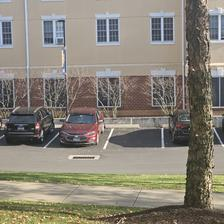

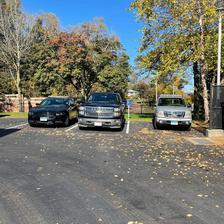

In [ ]:
results.show()

Pretrained weights results

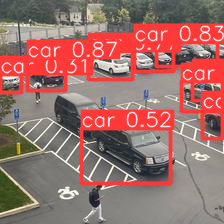

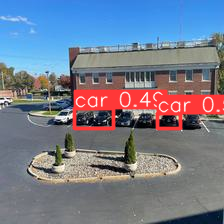

In [ ]:
results.show()

In [ ]:
%pwd

'/content'

### Finetuning the model

The pretrained model only detects cars and not empty parking space. So in this section we freeze most of the YOLOv5s layers and train the final `detect()` layer to detect both classes. Also worth noting is that we only have about 155 training images it is not a good idea to update too many weights.

The training dataset has been processed using Roboflow.

In [ ]:
%pwd

'/content'

In [ ]:
# git clone https://github.com/ultralytics/yolov5  # clone
%cd /content/drive/MyDrive/Project/yolov5
!pip install -r requirements.txt  # install

In [ ]:
!python /content/drive/MyDrive/Project/yolov5/train.py --batch 16 --weights '/content/drive/MyDrive/Project/yolov5s_fold_1.pt' --data '/content/drive/MyDrive/Project/yolov5/data.yaml' --epochs 50 --img 224 --freeze 24

2023-12-05 17:39:49.607039: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 17:39:49.607113: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 17:39:49.607174: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/Project/yolov5s_fold_1.pt, cfg=, data=/content/drive/MyDrive/Project/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=224, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=

In [ ]:
!python3 /content/drive/MyDrive/Project/yolov5/detect.py --weights '/content/drive/MyDrive/Project/yolov5/runs/train/exp29/weights/best.pt' --img 224 --conf 0.1 --source /content/drive/MyDrive/Project/dataset_resized/test/images

detect: weights=['/content/drive/MyDrive/Project/yolov5/runs/train/exp29/weights/best.pt'], source=/content/drive/MyDrive/Project/dataset_resized/test/images, data=drive/MyDrive/Project/yolov5/data/coco128.yaml, imgsz=[224, 224], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/Project/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/drive/MyDrive/Project/dataset_resized/test/images/20231026_152323.jpg: 224x224 6 occupieds, 6.6ms
image 2/20 /content/drive/MyDrive/Project/dataset_resized/test/images/202310

## Deployment

In [ ]:
!pip install flask_ngrok

In [ ]:
!pip install pyngrok==4.1.1
!ngrok authtoken ''

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=2b41863995d2f4ad314a82ece232795aec1d25ce9d3361a3534746f21951c544
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%cd /content/
!mkdir templates
!mkdir static

/content


In [ ]:
# %pwd
%cd static
!mkdir predictions

/content/static


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import os
# import torch
from PIL import Image

# Create flask app
app = Flask(__name__, static_folder="/content/static")
run_with_ngrok(app) # initialize with ngrok

# Add app routes
@app.route('/check')

# Create server response
def hello():
    return "Hello World!"

@app.route('/', methods=['GET', 'POST'])


def application():
  BASE_PATH = os.getcwd()
  UPLOAD_PATH = os.path.join(BASE_PATH, 'static/')
  if request.method == 'POST':
      upload_file = request.files['image_name']
      filename = upload_file.filename
      path_save = os.path.join(UPLOAD_PATH, filename)
      upload_file.save(path_save)
      img = Image.open(path_save)
      imgs = [img] # batch of images
      # Model
      model = torch.hub.load('ultralytics/yolov5', 'custom', path = file_path)
      # Inference
      results = model(imgs)
      # Results
      results.print()
      results.save(save_dir='/content/static/predictions/')
      # print(img)
      # print(path_save)
      return render_template('index.html', upload=True, filename=filename)

  return render_template('index.html', upload=False)


if __name__ == "__main__":
    app.run()





 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://c9eb-34-83-118-108.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:15:07] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:15:07] "GET /favicon.ico HTTP/1.1" 404 -
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-7 Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
image 1/1: 224x224 (no detections)
Speed: 10.8ms pre-process, 375.9ms inference, 0.4ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to /content/static/predictions
INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:15:19] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:15:19] "GET /static/3wesdx.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:15:19] "GET /static/predictions2/3wesdx.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Dec/2023 20:17:23] "GET / HTTP/1.1" 200 -
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-

## Citation

If you use YOLOv5 or YOLOv5u in your research, please cite the Ultralytics YOLOv5 repository as follows:

[![DOI](https://zenodo.org/badge/264818686.svg)](https://zenodo.org/badge/latestdoi/264818686)

In [ ]:
@software{yolov5,
  title = {YOLOv5 by Ultralytics},
  author = {Glenn Jocher},
  year = {2020},
  version = {7.0},
  license = {AGPL-3.0},
  url = {https://github.com/ultralytics/yolov5},
  doi = {10.5281/zenodo.3908559},
  orcid = {0000-0001-5950-6979}
}

## Contact

For YOLOv5 bug reports and feature requests please visit [GitHub Issues](https://github.com/ultralytics/yolov5/issues), and join our [Discord](https://discord.gg/n6cFeSPZdD) community for questions and discussions!

&nbsp;